Import libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

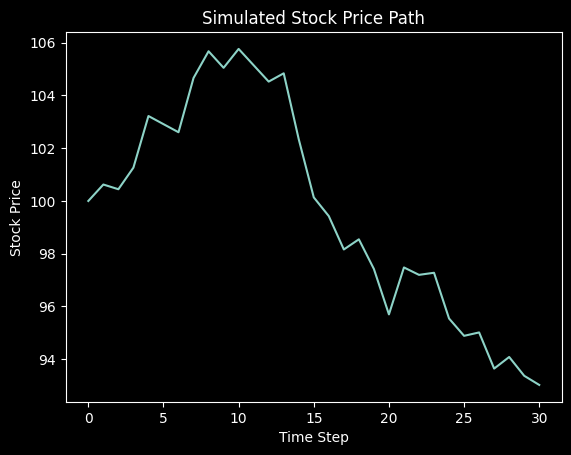

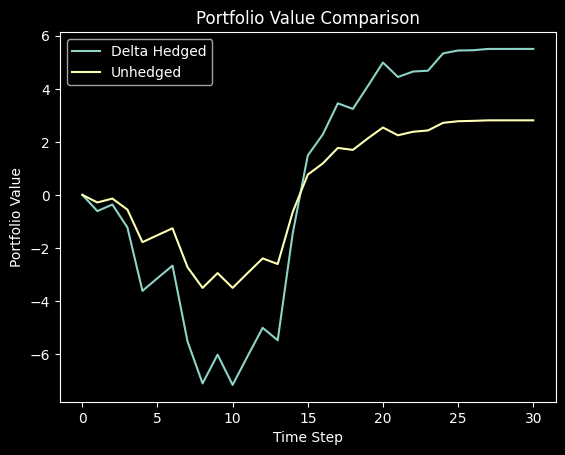

Final Hedged Portfolio Value: 5.50404852463678
Final Unhedged Portfolio Value: 2.8106773469827786


In [ ]:
# Black-Scholes Call Option

def black_scholes_call(S, K, T, r, sigma):
    if T <= 0:
        price = max(S - K, 0)
        delta = 1.0 if S > K else 0.0
        return price, delta

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    delta = norm.cdf(d1)

    return price, delta


# Simulation parameters

np.random.seed(42)

S0 = 100          # Initial stock price
K = 100           # Strike price
r = 0.01          # Risk-free rate
sigma = 0.2       # Volatility
T = 30 / 252      # 30 trading days
steps = 30
dt = T / steps


# Simulate Stock Price Path (GBM)

stock_prices = [S0]
S = S0

for _ in range(steps):
    Z = np.random.normal()
    S = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    stock_prices.append(S)


# Initialize Portfolio

option_prices = []
deltas = []

# Sell 1 call option
initial_option_price, initial_delta = black_scholes_call(S0, K, T, r, sigma)

cash_hedged = initial_option_price
cash_unhedged = initial_option_price

shares_hedged = -initial_delta  # Hedge initial delta
cash_hedged -= shares_hedged * S0

portfolio_hedged_values = []
portfolio_unhedged_values = []


# Run Delta Hedging Simulation

for i in range(steps + 1):
    S = stock_prices[i]
    remaining_T = max(T - i * dt, 0)

    option_price, delta = black_scholes_call(S, K, remaining_T, r, sigma)

    option_prices.append(option_price)
    deltas.append(delta)

    # Hedged portfolio
    portfolio_value_hedged = (
        cash_hedged
        + shares_hedged * S
        - option_price  # short 1 call
    )
    portfolio_hedged_values.append(portfolio_value_hedged)

    # Unhedged portfolio 
    portfolio_value_unhedged = (
        cash_unhedged
        - option_price
    )
    portfolio_unhedged_values.append(portfolio_value_unhedged)

    # Rebalance hedge 
    if i < steps:
        new_delta = delta
        delta_change = -(new_delta) - shares_hedged
        shares_hedged += delta_change
        cash_hedged -= delta_change * S

plt.figure()
plt.plot(stock_prices)
plt.style.use('dark_background')
plt.title("Simulated Stock Price Path")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.show()

plt.figure()
plt.plot(portfolio_hedged_values)
plt.plot(portfolio_unhedged_values)
plt.legend(["Delta Hedged", "Unhedged"])
plt.title("Portfolio Value Comparison")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.show()

print("Final Hedged Portfolio Value:", portfolio_hedged_values[-1])
print("Final Unhedged Portfolio Value:", portfolio_unhedged_values[-1])